[Reference](https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568)

In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline

In [3]:
import os
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!pwd
os.chdir('gdrive/My Drive/Colab Notebooks/')
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks


In [4]:
df = pd.read_csv('stack-overflow-data.csv')
df = df[pd.notnull(df['tags'])]
df.head(10)

,post,tags
0,what s the reason of duplicate unique index in...,mysql
1,.net 4.0 action<in t> not works for me here i...,.net
2,assigning text box values to a string array in...,javascript
3,how to get userid which is uniqueidentifier i...,asp.net
4,have multiple filters for same ng-model i hav...,angularjs
5,difference between *argv++ and *argv-- when re...,c
6,sql zeros and null i am new to sql and am rea...,sql
7,.net 4.0 and earlier versions .net 3.5 was di...,.net
8,homework help - javascript coin jar our teach...,javascript
9,nsdata is not writing to file properly i have...,objective-c


In [5]:
df['post'].apply(lambda x: len(x.split(' '))).sum()

2425750

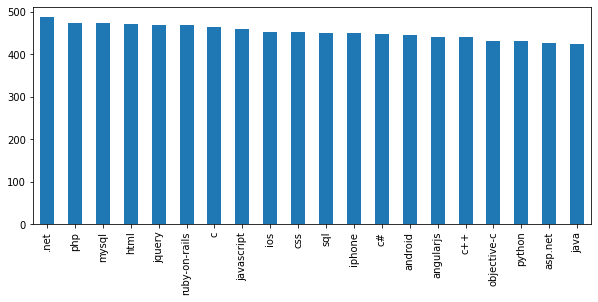

In [6]:
my_tags = ['java','html','asp.net','c#','ruby-on-rails','jquery','mysql','php','ios','javascript','python','c','css','android','iphone','sql','objective-c','c++','angularjs','.net']
plt.figure(figsize=(10,4))
df.tags.value_counts().plot(kind='bar');

In [7]:
def print_plot(index):
    example = df[df.index == index][['post', 'tags']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

In [8]:
print_plot(10)

do you need to specify to use the latest framework version   have a project compiled to use (targetframeworkversion) framework version 3.0 however it looks like there are some bug fixes in the latest v4.0 framework and hf.  as we want the app to be available even if it is leaking a bit on the earlier frameworks  we don t want to just set the target to 4.0.    when you browse the project you can see it has a runtime version but the  specific version  is flagged false.    when we run the app  can we tell what framework parts it is actually using. will it default to 3.0 or will it use the latest assemblies. if it defaults to 3.0 is there some way of setting some policy of some sort to use the new assembly if available.    will compiling against/targeting the 4.0 framework yield any different results on top of using it at runtime
Tag: .net


In [10]:
nltk.download('stopwords')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
df['post'] = df['post'].apply(clean_text)

In [12]:
print_plot(10)

need specify use latest framework version project compiled use targetframeworkversion framework version 30 however looks like bug fixes latest v40 framework hf want app available even leaking bit earlier frameworks want set target 40 browse project see runtime version specific version flagged false run app tell framework parts actually using default 30 use latest assemblies defaults 30 way setting policy sort use new assembly available compiling targeting 40 framework yield different results top using runtime
Tag: .net


In [13]:
df['post'].apply(lambda x: len(x.split(' '))).sum()

802196

In [14]:
X = df.post
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


# Naive Bayes classifier for multinomial models

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [16]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.6866495034939316
               precision    recall  f1-score   support

         java       0.48      0.71      0.57       139
         html       0.92      0.76      0.84       127
      asp.net       0.96      0.87      0.91       144
           c#       0.85      0.60      0.71       131
ruby-on-rails       0.50      0.90      0.64       124
       jquery       0.58      0.48      0.53       128
        mysql       0.94      0.59      0.73       142
          php       0.74      0.83      0.79       139
          ios       0.51      0.75      0.60       130
   javascript       0.64      0.64      0.64       137
       python       0.64      0.57      0.60       136
            c       0.76      0.71      0.74       118
          css       0.71      0.60      0.65       137
      android       0.74      0.84      0.79       147
       iphone       0.46      0.88      0.61       138
          sql       0.86      0.50      0.64       139
  objective-c       0.82      0.68  

# Linear support vector machine

In [17]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [18]:
%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7587348289812431
               precision    recall  f1-score   support

         java       0.74      0.69      0.72       139
         html       0.78      0.88      0.83       127
      asp.net       0.91      0.96      0.94       144
           c#       0.75      0.74      0.74       131
ruby-on-rails       0.68      0.85      0.76       124
       jquery       0.73      0.45      0.55       128
        mysql       0.78      0.64      0.71       142
          php       0.69      0.95      0.80       139
          ios       0.79      0.57      0.66       130
   javascript       0.70      0.61      0.65       137
       python       0.68      0.65      0.66       136
            c       0.73      0.75      0.74       118
          css       0.78      0.76      0.77       137
      android       0.83      0.78      0.80       147
       iphone       0.65      0.76      0.70       138
          sql       0.73      0.63      0.68       139
  objective-c       0.78      0.89  

# Logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [20]:
%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7557925707980875
               precision    recall  f1-score   support

         java       0.66      0.65      0.65       139
         html       0.84      0.85      0.84       127
      asp.net       0.96      0.90      0.93       144
           c#       0.77      0.74      0.75       131
ruby-on-rails       0.73      0.82      0.78       124
       jquery       0.51      0.56      0.54       128
        mysql       0.78      0.73      0.75       142
          php       0.82      0.84      0.83       139
          ios       0.63      0.70      0.66       130
   javascript       0.62      0.62      0.62       137
       python       0.64      0.64      0.64       136
            c       0.76      0.76      0.76       118
          css       0.72      0.76      0.74       137
      android       0.82      0.80      0.81       147
       iphone       0.74      0.76      0.75       138
          sql       0.80      0.65      0.72       139
  objective-c       0.82      0.80  

# Word2vec embedding and Logistic Regression

In [25]:
%%time
from gensim.models import Word2Vec

wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
wv.init_sims(replace=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


CPU times: user 1min 18s, sys: 8.47 s, total: 1min 26s
Wall time: 3min 5s


In [26]:
from itertools import islice
list(islice(wv.vocab, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

In [27]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [32]:
nltk.download('punkt')
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [33]:
train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['post']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['post']), axis=1).values

In [34]:
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['tags'])
y_pred = logreg.predict(X_test_word_average)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
print('accuracy %s' % accuracy_score(y_pred, test.tags))
print(classification_report(test.tags, y_pred,target_names=my_tags))

accuracy 0.5781537329900699
               precision    recall  f1-score   support

         java       0.52      0.54      0.53       139
         html       0.67      0.69      0.68       127
      asp.net       0.63      0.57      0.60       144
           c#       0.53      0.48      0.50       131
ruby-on-rails       0.66      0.71      0.68       124
       jquery       0.34      0.40      0.37       128
        mysql       0.60      0.58      0.59       142
          php       0.72      0.66      0.69       139
          ios       0.46      0.42      0.44       130
   javascript       0.49      0.46      0.48       137
       python       0.51      0.55      0.53       136
            c       0.59      0.68      0.63       118
          css       0.55      0.58      0.56       137
      android       0.49      0.59      0.53       147
       iphone       0.63      0.62      0.63       138
          sql       0.35      0.29      0.32       139
  objective-c       0.61      0.64  

# Doc2vec and Logistic Regression

In [37]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

In [45]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(gensim.models.doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df.post, df.tags, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [47]:
all_data[:2]

[TaggedDocument(words=['need', 'add', 'exponent', '1', 'stack', 'currently', 'studying', 'recursive', 'functions', 'javascript', 'part', 'understand', 'recursion', 'use', 'one', 'question', 'need', 'need', 'add', 'exponent', '1', 'stack', 'code', 'var', 'stack', 'recursive', 'function', 'function', 'power', 'base', 'exponent', 'base', 'case', 'exponent', '0', 'return', '1', 'recursive', 'case', 'else', 'need', 'exponent', '1', 'stack', 'exponent', '1', 'base', 'power', 'base', 'exponent', '1', 'return', 'stack', 'exponent', '1'], tags=['Train_0']),
 TaggedDocument(words=['scrolling', 'vertically', 'using', 'following', 'code', 'scroll', 'image', 'scrooll', 'view', 'storyviewscroller', 'uiscrollview', 'alloc', 'initwithframecgrectmake', '00f', '790f', '3200f', '262', 'autorelease', 'storyviewscrollercontentsize', 'cgsizemake', 'npages', '3200f', 'storyviewscrollerframesizeheight', 'storyviewscrollerpagingenabled', 'yes', 'storyviewscrollerdelegate', 'self', 'storyviewscrollershowshorizo

In [48]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

100%|██████████| 9061/9061 [00:00<00:00, 1351562.59it/s]


In [49]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 9061/9061 [00:00<00:00, 1207453.17it/s]


In [50]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [51]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [52]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [54]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.6723059948510481
               precision    recall  f1-score   support

         java       0.52      0.51      0.51       148
         html       0.77      0.79      0.78       133
      asp.net       0.92      0.85      0.88       134
           c#       0.51      0.58      0.54       119
ruby-on-rails       0.73      0.81      0.77       134
       jquery       0.49      0.48      0.49       130
        mysql       0.76      0.72      0.74       143
          php       0.69      0.72      0.70       119
          ios       0.52      0.55      0.53       142
   javascript       0.49      0.45      0.47       137
       python       0.54      0.59      0.57       144
            c       0.62      0.61      0.62       138
          css       0.66      0.62      0.64       138
      android       0.73      0.76      0.75       150
       iphone       0.69      0.76      0.72       131
          sql       0.53      0.50      0.51       126
  objective-c       0.77      0.76  

# BOW with keras

In [55]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [56]:
train_size = int(len(df) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 6342
Test size: 2719


In [57]:
train_posts = df['post'][:train_size]
train_tags = df['tags'][:train_size]

test_posts = df['post'][train_size:]
test_tags = df['tags'][train_size:]

In [58]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [59]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [60]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [61]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [62]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (6342, 1000)
x_test shape: (2719, 1000)
y_train shape: (6342, 20)
y_test shape: (2719, 20)


In [63]:
batch_size = 32
epochs = 2

In [64]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [65]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/2
179/179 [==============================] - 1s 8ms/step - loss: 1.8147 - accuracy: 0.5591 - val_loss: 0.9261 - val_accuracy: 0.7953
Epoch 2/2
179/179 [==============================] - 1s 8ms/step - loss: 0.7285 - accuracy: 0.8106 - val_loss: 0.7144 - val_accuracy: 0.8016


In [66]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

85/85 [==============================] - 0s 3ms/step - loss: 0.7583 - accuracy: 0.7654
Test accuracy: 0.7653549313545227
